In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

In [2]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [3]:
ads = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/shared/homeworks/python_ds_miniprojects/6/ads_data.csv")

In [4]:
ads_client = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/ads_clients_data.csv')

In [6]:
ads.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


Для начала посчитаем среднее количество разных рекламных событий (показы и клики) по объявлениям. Тонкий момент: помните, что некоторые показываемые объявления не кликались, и при группировке в таких случаях не будет строк с кликами, а для подсчёта среднего по объявлениям их нужно учитывать. Округлите ответы до целых чисел.

Могут понадобиться:

pivot()
fillna()

In [7]:
ads.groupby(['ad_id','event'],as_index = False)\
    .agg({'time':'count'})\
    .pivot(index = 'ad_id', columns = 'event', values = 'time')\
    .fillna(0)\
    .mean()


event
click    113.137824
view     923.131606
dtype: float64

Давайте посмотрим на распределение показов объявлений!

По оси x – число показов
По оси y – доля объявлений с такими показами
Прологарифмируйте число показов, а затем постройте такой график, чтобы можно было понять форму распределения.

In [8]:
data = ads.groupby(['ad_id','event'],as_index = False)\
    .agg({'time':'count'})\
    .pivot(index = 'ad_id', columns = 'event', values = 'time')\
   # .fillna(0)\

In [14]:
data

event,click,view
ad_id,,
2,1.0,101.0
3,3.0,184.0
1902,1.0,41.0
2064,NaN,35.0
2132,1.0,58.0
...,...,...
122004,4.0,100.0
122013,NaN,156.0
122023,NaN,68.0


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


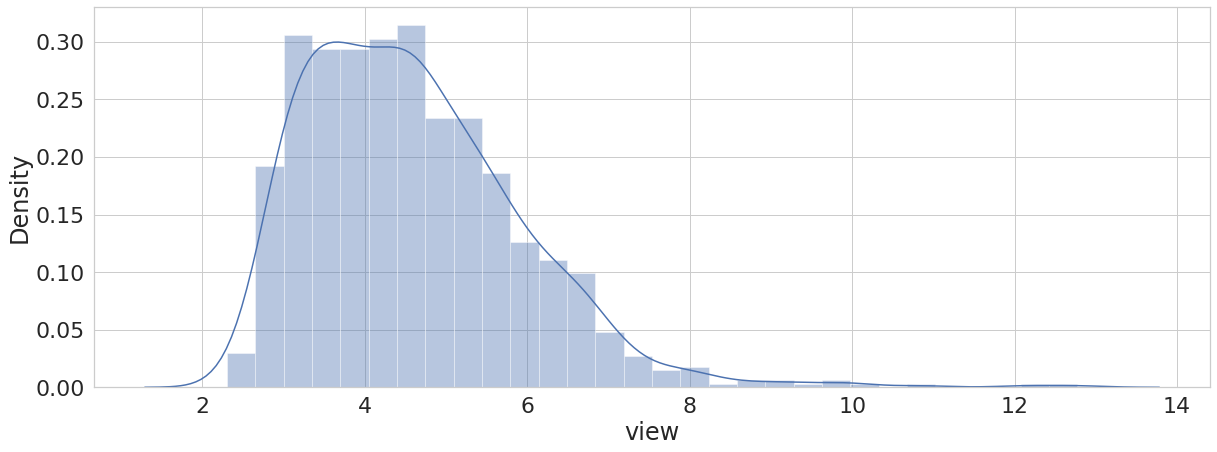

In [9]:
sns.distplot(np.log(data.view))

Теперь нужно найти среднее количество показов на 1 объявление (ad_id) по дням, не учитывая объявления, у которых не было показов (обычное среднее). После этого посчитайте скользящее среднее по полученному результату с окном в 2 элемента.

Вопрос: Какое значение скользящего среднего получим за 6 апреля 2019 года? Округлите ответ до целого числа.

In [48]:
mean_with_roll = ads[ads.event == 'view']\
    .groupby(['date','ad_id'],as_index = False)\
    .agg({'platform':'count'})\
    .pivot(index = 'ad_id',columns = 'date',values = 'platform')\
    .mean()\
    .rolling(2)\
    .mean()

In [49]:
mean_without_roll = ads[ads.event == 'view']\
    .groupby(['date','ad_id'],as_index = False)\
    .agg({'platform':'count'})\
    .pivot(index = 'ad_id',columns = 'date',values = 'platform')\
    .mean()\
    

Скользящее среднее часто используется для поиска аномалий в данных. Давайте попробуем нанести на один график значения просто среднего количества показов по дням и скользящего среднего на основе этих данных (которое мы получили в прошлом задании).

Посчитайте, в какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? Дни, в которых скользящее среднее равно NaN, не учитываем. Запишите ответ в формате yyyy-MM-dd

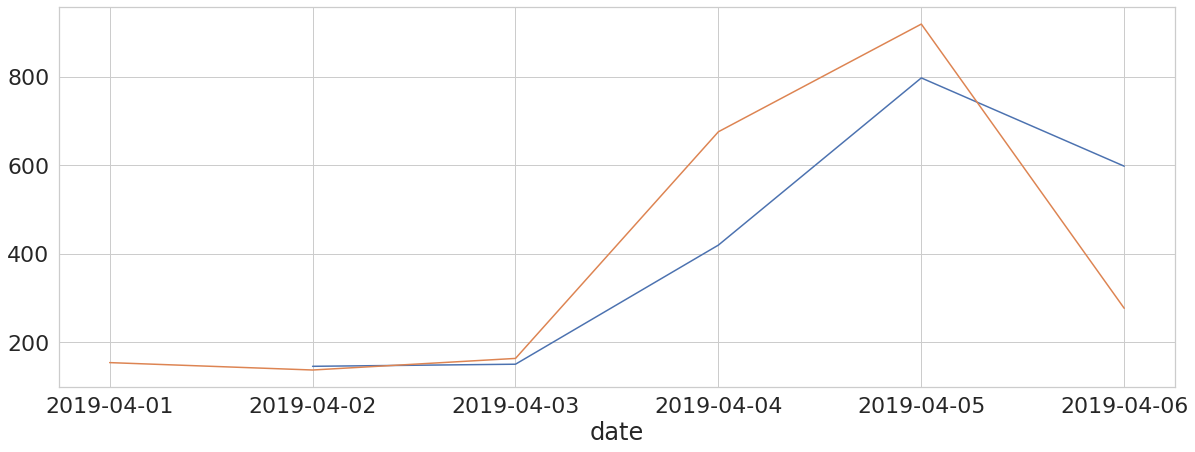

In [46]:
sns.lineplot(data = gg)
sns.lineplot(data = gg_1)


In [52]:
abs (mean_without_roll - mean_with_roll)

date
2019-04-01           NaN
2019-04-02      8.347644
2019-04-03     13.082898
2019-04-04    255.974471
2019-04-05    121.603979
2019-04-06    320.993475
dtype: float64

In [104]:
full_ad

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date,dif_time
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-04,2019-04-04 18:07:25,view,web,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04,31 days
999996,2019-04-04,2019-04-04 18:29:06,view,ios,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04,31 days
999997,2019-04-04,2019-04-04 18:55:46,view,web,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04,31 days
999998,2019-04-04,2019-04-04 19:21:09,view,android,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04,31 days


Объедините данные рекламы с данными о рекламных клиентах и найдите среднее количество дней от даты создания рекламного клиента (create_date) и первым запуском рекламного объявления этим клиентом (date).

В качестве ответа укажите среднее число дней.

In [18]:
#обьединение фреймов
full_ad = ads.merge(ads_client, on  = ['client_union_id'])

In [19]:
#перевод в формат даты
full_ad.create_date = pd.to_datetime(full_ad.create_date)
full_ad.date_x = pd.to_datetime(full_ad.date_x)

In [31]:
min_guga = full_ad.groupby(['client_union_id','create_date'],as_index = False)\
    .agg({'date_x':'min'})\
    .rename(columns = {'date_x':'min_date'})

In [71]:
min_guga['days']=(min_guga.min_date - min_guga.create_date)

In [53]:
min_guga.loc[(min_guga.days < pd.Timedelta(365, unit='day'))]

,client_union_id,create_date,min_date,days
0,1,2018-12-24,2019-04-01,98 days
1,9,2018-12-10,2019-04-03,114 days
2,13,2019-01-26,2019-04-02,66 days
3,16,2018-12-19,2019-04-03,105 days
4,20,2019-03-01,2019-04-02,32 days
...,...,...,...,...
833,122004,2019-01-24,2019-04-01,67 days
834,122013,2018-11-04,2019-04-04,151 days
835,122023,2018-11-29,2019-04-04,126 days
836,122031,2018-12-30,2019-04-05,96 days


💀 Сложное задание! 💀

Давайте вычислим конверсию из создания рекламного кабинета в запуск первой рекламы в течение не более 365 дней.

Конверсия – отношение числа клиентов, которые совершили целевое действие (создали рекламу), к общему числу клиентов. Например, 1000 клиентов создали кабинет, но лишь 50 из них запустили рекламу. В таком случае конверсия будет равна

1000
50
​
 ∗100=5%

Чтобы отобрать данные за нужный промежуток, можно воспользоваться сравнением времени до создания первой рекламы с pd.Timedelta(365, unit='day'))

Ответ дайте в процентах и округлите до сотых. Пример ответа:

In [43]:
year = pd.Timedelta(365, unit='day')

In [55]:
#число клиентов запустивших рекламу
min_guga.loc[(min_guga.days < year)].client_union_id.nunique()

838

In [ ]:
#общее число клиентов(которые создали кабинет)
ads_client.client_union_id.nunique()

In [56]:
covertion = (min_guga.loc[(min_guga.days < year)].client_union_id.nunique() / ads_client.client_union_id.nunique() ) * 100

In [57]:
covertion

0.6864463703533806

Давайте разобъем наших клиентов по промежуткам от создания рекламного кабинета до запуска первого рекламного объявления.

Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней). Список промежутков дней для метода pd.cut() – [0, 30, 90, 180, 365]. Создать временные промежутки можно с помощью pd.to_timedelta().

In [76]:
min_guga['days_conf'] = pd.cut(min_guga.days, bins =  pd.to_timedelta(['0d','30d','90d','180d','365d']),
                                 labels = ['0-30 days','30-90 days','90-180 days','180-365 days'])

In [87]:
min_guga.query("days_conf == '0-30 days'")\
    .agg({'days_conf':'count'})

days_conf    11
dtype: int64

In [91]:
min_guga

,client_union_id,create_date,min_date,days,days_conf
0,1,2018-12-24,2019-04-01,98 days,90-180 days
1,9,2018-12-10,2019-04-03,114 days,90-180 days
2,13,2019-01-26,2019-04-02,66 days,30-90 days
3,16,2018-12-19,2019-04-03,105 days,90-180 days
4,20,2019-03-01,2019-04-02,32 days,30-90 days
...,...,...,...,...,...
833,122004,2019-01-24,2019-04-01,67 days,30-90 days
834,122013,2018-11-04,2019-04-04,151 days,90-180 days
835,122023,2018-11-29,2019-04-04,126 days,90-180 days
836,122031,2018-12-30,2019-04-05,96 days,90-180 days


И последнее задание: постройте интерактивный барплот, на котором будут показаны категории с количеством уникальных клиентов в них (то, что у вас получилось на прошлом степе, по запуску первого рекламного объявления). 

In [96]:
roflan = min_guga.groupby('days_conf',as_index = False)\
    .agg({'client_union_id':'nunique'})

In [97]:
roflan

,days_conf,client_union_id
0,0-30 days,11
1,30-90 days,263
2,90-180 days,396
3,180-365 days,168


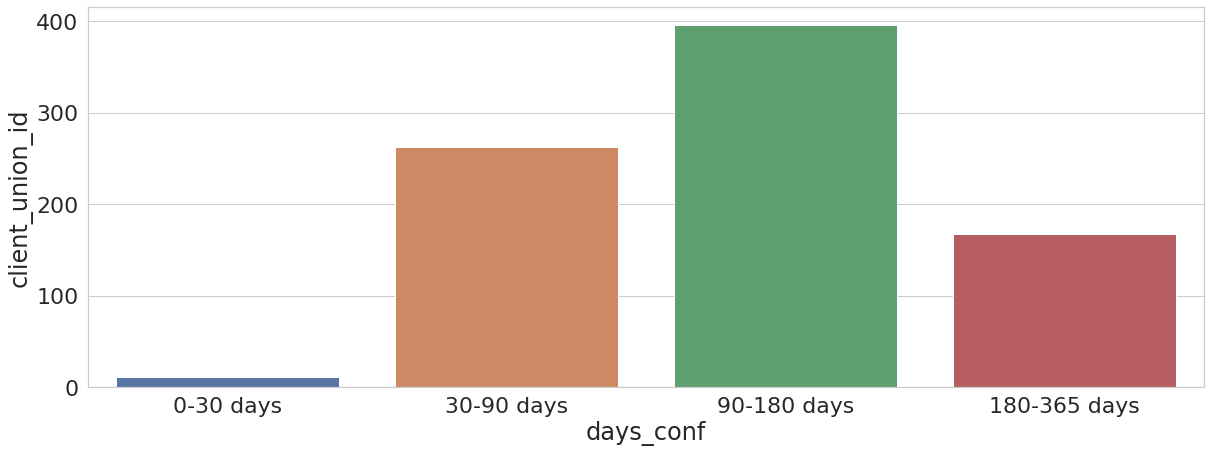

In [98]:
ax = sns.barplot(x="days_conf", y="client_union_id", data=roflan)